In [52]:
#!pip3 install tensorflow-probability

In [53]:
import pandas as pd
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp

In [54]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [55]:
data = pd.read_csv('sub.txt', header = 2, sep='\t', quotechar='"')

In [56]:
data.shape

(100, 17384)

In [57]:
sample = pd.read_csv('GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt', header = 0, sep='\t')

In [58]:
data

,Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,...,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
0,ENSG00000223972.5,DDX11L1,0.00000,0.0000,0.0000,0.00000,0.0000,0.000,0.000,0.00000,...,0.00000,0.03629,0.00000,0.0000,0.00000,0.0000,0.000,0.00000,0.01965,0.02522
1,ENSG00000227232.5,WASH7P,8.76400,3.8610,7.3490,11.07000,3.3060,5.389,11.990,16.95000,...,1.60600,2.26800,5.38600,2.3100,2.45600,4.0230,1.922,2.85700,0.86960,2.16700
2,ENSG00000278267.1,MIR6859-1,0.00000,0.0000,1.0040,0.00000,0.0000,0.000,0.000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.0000,0.000,0.00000,0.00000,0.00000
3,ENSG00000243485.5,MIR1302-2HG,0.07187,0.0000,0.0000,0.06761,0.0000,0.000,0.000,0.00000,...,0.00000,0.00000,0.06073,0.0000,0.08464,0.1435,0.000,0.05216,0.00000,0.00000
4,ENSG00000237613.2,FAM138A,0.00000,0.0000,0.0000,0.00000,0.0000,0.000,0.000,0.03904,...,0.02429,0.00000,0.00000,0.0000,0.00000,0.0000,0.000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ENSG00000169962.4,TAS1R3,0.95130,0.7052,0.8024,0.84330,0.9251,2.679,1.082,2.08400,...,0.43520,0.47950,1.32900,0.7763,0.42010,0.6574,1.072,0.42490,0.91860,0.58960
96,ENSG00000107404.19,DVL1,75.81000,125.9000,72.7300,86.00000,35.4100,44.380,125.700,129.30000,...,47.84000,78.74000,69.52000,60.7600,65.69000,65.5300,64.680,62.58000,158.00000,46.94000
97,ENSG00000284372.1,MIR6808,0.00000,0.0000,0.0000,0.00000,0.0000,0.000,0.000,0.00000,...,0.50190,0.00000,0.00000,0.0000,0.00000,0.0000,0.000,0.00000,0.00000,0.00000
98,ENSG00000162576.16,MXRA8,906.60000,16.0100,123.6000,255.30000,94.5500,71.400,276.700,60.07000,...,74.44000,29.13000,93.79000,48.2000,53.87000,239.5000,35.450,119.20000,19.22000,155.50000


In [13]:
x = tf.random.normal(shape=(100, 2, 3))
y = tf.random.normal(shape=(100, 2, 3))

# corr[i, j] is the sample correlation between x[:, i, j] and y[:, i, j].
corr = tfp.stats.correlation(x, y, sample_axis=0, event_axis=None)

# corr_matrix[i, m, n] is the sample correlation of x[:, i, m] and y[:, i, n]
corr_matrix = tfp.stats.correlation(x, y, sample_axis=0, event_axis=-1)

In [14]:
corr_matrix

<tf.Tensor: shape=(2, 3, 3), dtype=float32, numpy=
array([[[-0.0397712 ,  0.13065074, -0.06928357],
        [-0.08831787,  0.12938465, -0.0364213 ],
        [-0.13157079, -0.03568987,  0.03412348]],

       [[-0.16320945, -0.06042179, -0.04557263],
        [-0.01251672, -0.12056058, -0.05159739],
        [-0.00341268,  0.08261202, -0.21296683]]], dtype=float32)>

In [15]:
corr

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-0.03977119,  0.12938467,  0.03412347],
       [-0.16320948, -0.1205606 , -0.21296683]], dtype=float32)>

In [18]:
tfp.stats.correlation(x[:, 1, :], sample_axis = 0, event_axis = -1)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 1.        , -0.13202995,  0.08848934],
       [-0.13202995,  1.        , -0.01662786],
       [ 0.08848934, -0.01662786,  1.        ]], dtype=float32)>

In [26]:
x = tf.random.normal(shape=(1000, 200))
tmp = tfp.stats.correlation(x, sample_axis = 0, event_axis = -1)

In [27]:
tmp.numpy().shape

(200, 200)

In [25]:
pd.DataFrame(tmp.numpy()[0, :, :])

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,-0.040474,0.011414,0.042838,0.056449,0.061558,0.035021,-0.002900,-0.023919,0.008933,...,-0.002888,0.032458,0.012763,0.032717,-0.020555,0.017565,-0.002673,0.040393,0.023108,0.017395
1,-0.040474,1.000000,-0.040161,0.029481,-0.008203,0.000029,0.012946,0.023521,-0.053167,-0.026208,...,0.004298,-0.067048,0.017995,-0.029109,0.018098,-0.011595,0.029579,-0.005363,-0.053500,0.017518
2,0.011414,-0.040161,1.000000,-0.055432,0.060104,-0.033132,-0.010491,-0.041616,-0.001747,0.037000,...,-0.027378,0.001413,0.024774,0.017592,0.000954,0.039835,-0.001322,-0.013774,-0.031752,-0.040589
3,0.042838,0.029481,-0.055432,1.000000,-0.019489,0.006307,0.024666,0.053264,0.001178,0.032352,...,-0.034547,0.015233,0.020703,0.012613,-0.023689,0.000895,-0.038365,0.002920,-0.062878,0.025216
4,0.056449,-0.008203,0.060104,-0.019489,1.000000,0.023101,-0.015128,-0.032878,0.004600,0.024858,...,-0.051042,-0.053813,-0.059063,-0.025003,-0.008256,0.032893,-0.026139,0.016012,-0.009167,0.002235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.017565,-0.011595,0.039835,0.000895,0.032893,0.020697,0.068948,-0.035427,0.023054,-0.027987,...,-0.036625,0.079853,0.034978,-0.000495,0.051135,1.000000,-0.013353,-0.062235,0.053607,0.007461
196,-0.002673,0.029579,-0.001322,-0.038365,-0.026139,-0.013941,0.064470,0.040384,-0.009772,-0.017876,...,-0.012259,0.014419,-0.004691,-0.016043,0.053008,-0.013353,1.000000,-0.010764,0.001629,0.020009
197,0.040393,-0.005363,-0.013774,0.002920,0.016012,-0.002400,0.021998,0.084582,-0.012781,-0.036975,...,-0.021263,0.005474,-0.000480,-0.051537,0.013064,-0.062235,-0.010764,1.000000,-0.011297,0.042092
198,0.023108,-0.053500,-0.031752,-0.062878,-0.009167,0.036602,0.042269,-0.024413,0.014264,0.030483,...,-0.019565,0.005938,0.016153,-0.029626,-0.018005,0.053607,0.001629,-0.011297,1.000000,0.006137


In [28]:
pd.DataFrame(tmp.numpy())

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,0.001640,0.010989,-0.041794,0.004412,-0.000746,-0.010217,-0.006181,0.030130,0.034309,...,-0.040446,0.025329,-0.008916,0.020310,0.030298,0.033733,-0.036945,-0.019786,0.005021,-0.044049
1,0.001640,1.000000,-0.033172,-0.004117,-0.013744,-0.033324,-0.021965,-0.005165,-0.016974,-0.011892,...,-0.034179,0.012233,-0.015072,-0.032633,-0.057718,-0.030016,-0.038133,0.007440,-0.016323,-0.069234
2,0.010989,-0.033172,1.000000,-0.023278,0.007871,-0.006596,-0.023701,0.042838,-0.040242,0.032719,...,-0.033766,-0.026365,-0.028842,0.006639,-0.002108,-0.012137,-0.026424,-0.009635,-0.000826,-0.026969
3,-0.041794,-0.004117,-0.023278,1.000000,0.017627,-0.022102,0.004507,-0.007417,-0.001444,0.003656,...,0.014342,-0.011690,0.008084,0.014149,0.064500,0.013671,0.069335,0.010375,0.022281,-0.028901
4,0.004412,-0.013744,0.007871,0.017627,1.000000,-0.056928,0.012325,-0.027397,-0.009118,-0.031936,...,0.031282,0.030616,-0.009298,0.040595,0.025374,0.056732,-0.006177,-0.014798,-0.050726,-0.007358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.033733,-0.030016,-0.012137,0.013671,0.056732,-0.003182,0.008949,-0.052692,-0.000372,0.012034,...,-0.045100,-0.014642,0.025336,0.030023,0.035733,1.000000,0.004070,-0.020665,-0.018863,0.028955
196,-0.036945,-0.038133,-0.026424,0.069335,-0.006177,0.022312,0.009032,0.044902,-0.001121,0.028839,...,0.021281,-0.019208,-0.021679,0.048074,-0.002071,0.004070,1.000000,0.003118,0.019888,-0.067277
197,-0.019786,0.007440,-0.009635,0.010375,-0.014798,-0.014816,0.003263,0.018640,-0.026345,0.041808,...,-0.006555,-0.013143,-0.001031,-0.015885,0.018012,-0.020665,0.003118,1.000000,-0.079466,-0.032933
198,0.005021,-0.016323,-0.000826,0.022281,-0.050726,-0.004882,-0.045668,0.021953,-0.009597,-0.031856,...,-0.008767,0.020453,0.021693,0.043115,-0.035917,-0.018863,0.019888,-0.079466,1.000000,0.021178


In [34]:
pd.DataFrame(x.numpy())

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.874899,-0.230795,2.106190,-1.631676,-0.736914,0.203989,-1.402867,0.080755,-0.283925,0.510729,...,0.918796,0.311688,0.371733,0.322792,0.985217,0.428711,-0.403744,0.244981,0.815094,1.012100
1,0.177259,-0.153435,0.637466,-0.292008,1.245237,-0.108660,-0.332237,-0.106446,0.307332,0.335487,...,-0.100134,0.467265,-0.072132,-1.033840,1.055206,0.309602,0.227787,-0.383001,-1.296955,0.960613
2,-1.027557,0.405300,0.280807,0.692904,0.742158,2.091928,0.620722,-0.065240,-1.729090,-0.265546,...,0.636089,-0.954789,-2.199343,0.043374,-0.016965,0.094513,-0.694747,-0.832390,0.271869,-0.749903
3,-1.336933,1.943230,-0.554216,0.004084,0.310183,0.330649,-0.781011,-0.025110,1.136774,-0.347878,...,0.291765,0.774873,-0.269702,-0.182276,-0.899836,-1.635619,-1.723610,0.211677,-0.262852,1.347393
4,1.515614,-0.010193,1.120136,-0.159209,-0.814244,1.454441,-0.885642,-0.951486,-0.444350,1.284118,...,-0.506560,0.511520,1.718171,-1.853002,1.434309,-0.949083,1.313894,-1.001137,-0.468475,0.480995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.154387,1.642652,-2.300016,1.183311,-0.629359,-1.044242,0.260053,-0.674531,0.921574,0.608231,...,0.401240,-1.989368,0.268490,0.082296,0.511168,-0.405672,0.777328,0.086206,-0.305973,0.339903
996,-1.095897,0.263057,-0.535755,0.574375,0.242304,0.287810,0.123533,-0.508107,-0.312881,2.077856,...,0.856613,0.646625,-0.195605,-0.549537,0.453409,-0.944523,1.355181,0.387903,-0.188823,0.902055
997,0.529548,0.557292,-1.079347,2.364586,0.786134,-2.246355,-1.560801,-0.167046,-0.764618,-0.285503,...,-0.076318,-0.361383,0.873710,0.805484,0.403775,0.691468,-1.776038,-2.097938,0.958309,0.399728
998,-0.977099,1.399946,-1.243857,-0.590127,-0.197863,0.392968,-0.743678,0.268283,-1.501041,1.339614,...,0.391992,0.327341,0.215253,-0.189515,0.438106,2.390317,-0.812900,-1.731902,-2.413210,1.015061


In [35]:
pd.DataFrame(x.numpy()).corr()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,0.001640,0.010989,-0.041794,0.004412,-0.000746,-0.010217,-0.006181,0.030130,0.034309,...,-0.040446,0.025329,-0.008916,0.020310,0.030298,0.033733,-0.036945,-0.019786,0.005021,-0.044049
1,0.001640,1.000000,-0.033172,-0.004117,-0.013744,-0.033324,-0.021965,-0.005165,-0.016974,-0.011892,...,-0.034179,0.012233,-0.015072,-0.032633,-0.057718,-0.030016,-0.038133,0.007440,-0.016323,-0.069234
2,0.010989,-0.033172,1.000000,-0.023278,0.007871,-0.006596,-0.023701,0.042838,-0.040242,0.032719,...,-0.033766,-0.026365,-0.028842,0.006639,-0.002108,-0.012137,-0.026424,-0.009635,-0.000826,-0.026969
3,-0.041794,-0.004117,-0.023278,1.000000,0.017627,-0.022102,0.004507,-0.007417,-0.001444,0.003656,...,0.014342,-0.011690,0.008084,0.014149,0.064500,0.013671,0.069335,0.010375,0.022281,-0.028901
4,0.004412,-0.013744,0.007871,0.017627,1.000000,-0.056928,0.012325,-0.027397,-0.009118,-0.031936,...,0.031282,0.030616,-0.009298,0.040595,0.025374,0.056732,-0.006177,-0.014798,-0.050726,-0.007358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.033733,-0.030016,-0.012137,0.013671,0.056732,-0.003182,0.008949,-0.052692,-0.000372,0.012034,...,-0.045100,-0.014642,0.025336,0.030023,0.035733,1.000000,0.004070,-0.020665,-0.018863,0.028955
196,-0.036945,-0.038133,-0.026424,0.069335,-0.006177,0.022312,0.009032,0.044902,-0.001121,0.028839,...,0.021281,-0.019208,-0.021679,0.048074,-0.002071,0.004070,1.000000,0.003118,0.019888,-0.067277
197,-0.019786,0.007440,-0.009635,0.010375,-0.014798,-0.014816,0.003263,0.018640,-0.026345,0.041808,...,-0.006555,-0.013143,-0.001031,-0.015885,0.018012,-0.020665,0.003118,1.000000,-0.079466,-0.032933
198,0.005021,-0.016323,-0.000826,0.022281,-0.050726,-0.004882,-0.045668,0.021953,-0.009597,-0.031856,...,-0.008767,0.020453,0.021693,0.043115,-0.035917,-0.018863,0.019888,-0.079466,1.000000,0.021178


In [9]:
x_numpy = np.random.normal(size=(562,17382))
res = pd.DataFrame(np.corrcoef(x_numpy, rowvar=True))

In [10]:
res

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,561
0,1.000000,0.010854,-0.000208,-0.011067,-0.004611,0.005486,-0.012396,0.003068,0.004400,-0.003499,...,0.001039,-0.009192,-0.002041,0.003286,-0.010017,-0.003396,0.008731,0.010280,-0.003802,0.007049
1,0.010854,1.000000,-0.001702,0.004973,0.008145,-0.000233,-0.012532,0.001589,-0.011542,0.001597,...,0.001576,-0.009169,0.004610,0.003223,-0.000746,-0.001745,-0.000456,0.014244,-0.009062,-0.000788
2,-0.000208,-0.001702,1.000000,0.007210,0.005886,0.012854,-0.011021,0.011068,-0.009160,0.005296,...,0.003487,0.004962,-0.014991,0.005151,-0.007498,-0.000565,0.005088,0.005225,0.008329,-0.000774
3,-0.011067,0.004973,0.007210,1.000000,0.009521,-0.002485,-0.000339,0.001594,-0.002916,-0.001844,...,-0.007799,-0.000606,0.020234,-0.000678,0.007584,0.001927,-0.000406,-0.008806,-0.003726,0.006533
4,-0.004611,0.008145,0.005886,0.009521,1.000000,-0.005898,-0.002579,-0.005442,0.004237,0.000479,...,-0.002057,0.007585,0.014790,-0.000338,0.006091,0.008766,-0.007145,-0.001984,0.002532,0.004611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,-0.003396,-0.001745,-0.000565,0.001927,0.008766,-0.001783,0.004295,-0.003968,-0.012025,-0.001100,...,-0.000589,-0.006191,0.002551,-0.002432,-0.002431,1.000000,0.011214,0.000253,-0.009053,-0.002880
558,0.008731,-0.000456,0.005088,-0.000406,-0.007145,-0.013366,-0.018640,-0.011888,-0.011499,-0.008500,...,-0.005911,-0.002298,0.011159,0.002919,-0.012659,0.011214,1.000000,-0.005388,-0.009178,0.011834
559,0.010280,0.014244,0.005225,-0.008806,-0.001984,-0.001939,0.001638,0.010379,-0.007085,-0.003443,...,-0.000950,-0.007369,-0.008991,-0.000632,0.008151,0.000253,-0.005388,1.000000,-0.008243,0.005676
560,-0.003802,-0.009062,0.008329,-0.003726,0.002532,0.007904,0.005284,-0.008797,0.000586,-0.010960,...,-0.001245,-0.005567,-0.007061,-0.007763,0.010374,-0.009053,-0.009178,-0.008243,1.000000,-0.009611


In [11]:
x_numpy = np.random.normal(size=(562,17382))
res = pd.DataFrame(np.transpose(x_numpy)).corr()

In [12]:
res

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,561
0,1.000000,-0.000231,0.007682,-0.004931,-0.005321,0.003367,-0.005278,-0.005204,-8.161971e-03,0.000473,...,0.002605,-0.000668,0.003202,0.013550,-0.005157,-0.013355,-0.012726,-0.009805,0.000062,0.000543
1,-0.000231,1.000000,0.007976,-0.003922,-0.011695,0.001035,-0.003921,0.004226,-8.726267e-04,-0.004373,...,-0.001392,0.018477,-0.007540,0.002941,0.008714,0.011341,-0.003636,0.008134,-0.001286,0.004159
2,0.007682,0.007976,1.000000,-0.014729,0.006385,0.007632,-0.004673,0.004509,-1.146347e-02,-0.001789,...,0.000303,0.003200,0.004468,-0.010575,-0.004159,0.001861,0.003884,0.006911,0.007057,0.000937
3,-0.004931,-0.003922,-0.014729,1.000000,0.007162,0.003002,-0.007558,-0.007765,1.419573e-02,-0.005087,...,-0.007542,-0.006653,-0.002051,-0.010361,-0.006943,-0.009103,-0.018247,-0.014635,0.020589,0.005192
4,-0.005321,-0.011695,0.006385,0.007162,1.000000,0.001198,0.007008,-0.005221,-9.060960e-03,-0.003507,...,-0.003115,0.007228,0.004136,-0.000683,-0.013586,0.009545,-0.021469,0.004970,-0.004820,-0.003388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,-0.013355,0.011341,0.001861,-0.009103,0.009545,-0.007967,-0.010037,0.008212,-8.945778e-03,0.008532,...,-0.004815,0.002391,0.002439,0.002510,0.001638,1.000000,0.009599,0.008295,0.001189,-0.008196
558,-0.012726,-0.003636,0.003884,-0.018247,-0.021469,-0.000528,-0.008282,0.012260,1.120582e-03,-0.004037,...,-0.004214,0.012829,0.010399,0.000902,0.001024,0.009599,1.000000,0.004890,-0.002549,0.005063
559,-0.009805,0.008134,0.006911,-0.014635,0.004970,-0.015792,-0.012555,-0.004860,-5.481254e-03,-0.005270,...,0.008470,0.007315,0.002088,0.012536,0.007911,0.008295,0.004890,1.000000,-0.002187,0.001319
560,0.000062,-0.001286,0.007057,0.020589,-0.004820,0.001700,0.000822,-0.006708,-5.956773e-07,-0.005649,...,0.010605,-0.004011,0.000578,-0.001930,-0.002059,0.001189,-0.002549,-0.002187,1.000000,0.016283


In [15]:
x = tf.random.normal(shape=(5620, 17382))
res = tfp.stats.correlation(x, sample_axis = -1, event_axis = 0)

In [16]:
pd.DataFrame(res.numpy())

,0,1,2,3,4,5,6,7,8,9,...,5610,5611,5612,5613,5614,5615,5616,5617,5618,5619
0,0.999996,0.009129,-0.004659,-0.005996,-0.009370,-0.003238,0.005850,-0.002805,-0.000295,-0.002795,...,0.010662,0.005667,-0.000166,-0.003306,-0.000033,-0.005021,-0.016904,-0.005705,-0.007963,-0.010891
1,0.009129,0.999998,0.000246,-0.005692,0.004242,-0.004073,-0.003029,-0.004177,0.002408,-0.008061,...,-0.009200,-0.003313,0.004720,-0.003591,0.006935,-0.016071,-0.005205,0.007765,-0.013746,0.001827
2,-0.004659,0.000246,1.000000,-0.002357,-0.010132,-0.003134,-0.003437,0.002692,-0.008378,0.003250,...,-0.001160,0.003345,-0.005819,-0.004973,-0.007562,-0.005805,0.013950,-0.003203,-0.001079,0.001450
3,-0.005996,-0.005692,-0.002357,0.999996,0.006823,-0.003737,-0.003728,-0.006078,-0.004329,-0.015031,...,0.005754,0.009856,-0.016153,0.001919,0.001453,0.003586,-0.009687,-0.003148,-0.006962,0.003941
4,-0.009370,0.004242,-0.010132,0.006823,1.000000,-0.000499,0.004197,-0.002254,-0.000059,-0.001201,...,-0.000334,-0.015208,-0.001950,-0.000643,0.002019,-0.007499,-0.001035,-0.005060,-0.012383,0.020583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,-0.005021,-0.016071,-0.005805,0.003586,-0.007499,0.007671,-0.007633,0.006267,0.004424,-0.008192,...,-0.001539,-0.001904,0.003982,0.004909,0.000188,0.999994,0.004471,-0.001430,-0.007316,0.002910
5616,-0.016904,-0.005205,0.013950,-0.009687,-0.001035,-0.005597,-0.008209,-0.008013,-0.007002,0.010199,...,0.015916,-0.010604,0.001019,-0.001954,0.002775,0.004471,1.000002,0.001985,0.005541,-0.005703
5617,-0.005705,0.007765,-0.003203,-0.003148,-0.005060,-0.005240,0.001355,0.004737,-0.002246,0.005848,...,0.000409,0.003217,0.000593,-0.005470,-0.008139,-0.001430,0.001985,0.999997,-0.005027,-0.008659
5618,-0.007963,-0.013746,-0.001079,-0.006962,-0.012383,0.010145,0.008829,0.003810,0.004838,0.002959,...,0.012360,0.020705,-0.009834,-0.022189,0.007451,-0.007316,0.005541,-0.005027,0.999996,0.009469


In [19]:
res = tfp.stats.correlation(x, sample_axis = -1, event_axis = 0)
pd.DataFrame(res.numpy())

,0,1,2,3,4,5,6,7,8,9,...,5610,5611,5612,5613,5614,5615,5616,5617,5618,5619
0,0.999996,0.009129,-0.004659,-0.005996,-0.009370,-0.003238,0.005850,-0.002805,-0.000295,-0.002795,...,0.010662,0.005667,-0.000166,-0.003306,-0.000033,-0.005021,-0.016904,-0.005705,-0.007963,-0.010891
1,0.009129,0.999998,0.000246,-0.005692,0.004242,-0.004073,-0.003029,-0.004177,0.002408,-0.008061,...,-0.009200,-0.003313,0.004720,-0.003591,0.006935,-0.016071,-0.005205,0.007765,-0.013746,0.001827
2,-0.004659,0.000246,1.000000,-0.002357,-0.010132,-0.003134,-0.003437,0.002692,-0.008378,0.003250,...,-0.001160,0.003345,-0.005819,-0.004973,-0.007562,-0.005805,0.013950,-0.003203,-0.001079,0.001450
3,-0.005996,-0.005692,-0.002357,0.999996,0.006823,-0.003737,-0.003728,-0.006078,-0.004329,-0.015031,...,0.005754,0.009856,-0.016153,0.001919,0.001453,0.003586,-0.009687,-0.003148,-0.006962,0.003941
4,-0.009370,0.004242,-0.010132,0.006823,1.000000,-0.000499,0.004197,-0.002254,-0.000059,-0.001201,...,-0.000334,-0.015208,-0.001950,-0.000643,0.002019,-0.007499,-0.001035,-0.005060,-0.012383,0.020583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,-0.005021,-0.016071,-0.005805,0.003586,-0.007499,0.007671,-0.007633,0.006267,0.004424,-0.008192,...,-0.001539,-0.001904,0.003982,0.004909,0.000188,0.999994,0.004471,-0.001430,-0.007316,0.002910
5616,-0.016904,-0.005205,0.013950,-0.009687,-0.001035,-0.005597,-0.008209,-0.008013,-0.007002,0.010199,...,0.015916,-0.010604,0.001019,-0.001954,0.002775,0.004471,1.000002,0.001985,0.005541,-0.005703
5617,-0.005705,0.007765,-0.003203,-0.003148,-0.005060,-0.005240,0.001355,0.004737,-0.002246,0.005848,...,0.000409,0.003217,0.000593,-0.005470,-0.008139,-0.001430,0.001985,0.999997,-0.005027,-0.008659
5618,-0.007963,-0.013746,-0.001079,-0.006962,-0.012383,0.010145,0.008829,0.003810,0.004838,0.002959,...,0.012360,0.020705,-0.009834,-0.022189,0.007451,-0.007316,0.005541,-0.005027,0.999996,0.009469


In [87]:
x = tf.random.normal(shape=(5000, 17382,))
y = tf.random.normal(shape=(5000, 17382,))
res = tfp.stats.correlation(x, y, sample_axis = -1, event_axis = 0)

ResourceExhaustedError: OOM when allocating tensor with shape[5000,17382] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Mul]

In [85]:
res

<tf.Tensor: shape=(1000, 1000), dtype=float32, numpy=
array([[-0.00111959, -0.00147232,  0.00242917, ...,  0.0002768 ,
        -0.00334484,  0.00501225],
       [ 0.00204238, -0.00638503,  0.01017416, ..., -0.00498892,
        -0.01707897,  0.01100292],
       [-0.00725143,  0.00054702,  0.00406955, ..., -0.00440225,
         0.01309624, -0.01181232],
       ...,
       [ 0.00738649, -0.00531424,  0.00862614, ..., -0.00100102,
         0.00315572,  0.0052234 ],
       [-0.00095692, -0.00694412,  0.01372741, ...,  0.0035596 ,
        -0.00095677,  0.00288509],
       [-0.00839871, -0.00466189,  0.01033083, ...,  0.00336049,
        -0.00274038, -0.00187777]], dtype=float32)>

In [49]:
x

<tf.Tensor: shape=(1, 17382), dtype=float32, numpy=
array([[-1.2519696 ,  0.9724661 ,  0.65386915, ..., -1.0645733 ,
        -0.726192  ,  0.21716018]], dtype=float32)>

In [50]:
res

<tf.Tensor: shape=(17382,), dtype=float32, numpy=array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)>

In [41]:
corr_matrix

<tf.Tensor: shape=(2, 3, 3), dtype=float32, numpy=
array([[[-0.18321145, -0.05751704, -0.00097363],
        [ 0.21187013,  0.13437027, -0.03938729],
        [ 0.01389297, -0.01504228, -0.04809825]],

       [[ 0.02087836, -0.04385706, -0.00970371],
        [ 0.21717514,  0.10105163, -0.12350056],
        [ 0.0525067 , -0.05556542,  0.03897935]]], dtype=float32)>

In [25]:
x.numpy()

array([ 2.2991128 ,  0.9492706 ,  0.04906976, ..., -0.5347527 ,
        2.0554743 ,  0.41962856], dtype=float32)

In [59]:
data_float = data.to_numpy()[:, 2:].astype(float)

In [60]:
data_float.shape

(100, 17382)

In [38]:
x_numpy.shape

(1000, 200)

In [61]:
d_tensor = tf.convert_to_tensor(data_float)
res = tfp.stats.correlation(d_tensor, sample_axis = -1, event_axis = 0)
pd.DataFrame(res.numpy())

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.081908,0.018211,0.181078,0.080914,0.063978,0.100390,0.034440,0.298725,0.110512,...,0.090755,0.142468,0.021609,-0.027647,0.436313,0.113697,0.161088,0.027524,-0.055647,0.536167
1,0.081908,1.000000,0.089267,-0.023312,-0.020190,-0.090528,-0.099835,-0.117145,0.094330,0.013247,...,0.415810,0.602166,0.023465,0.533535,0.177302,0.256476,0.291858,-0.001037,0.276292,0.073778
2,0.018211,0.089267,1.000000,0.009848,-0.002921,0.009067,0.001313,0.008285,0.001609,-0.002032,...,0.050594,0.062735,0.019060,0.059858,0.021832,0.031506,0.039672,0.007032,0.037987,0.013449
3,0.181078,-0.023312,0.009848,1.000000,0.393966,0.598822,0.638112,0.400843,0.061383,-0.019761,...,-0.018322,-0.012784,0.154779,-0.038191,0.089261,0.028281,0.033190,0.102358,-0.071936,0.098504
4,0.080914,-0.020190,-0.002921,0.393966,1.000000,0.399001,0.440002,0.291120,0.036993,-0.005890,...,-0.040011,-0.015464,0.115457,-0.018131,0.028690,0.017620,0.008201,0.069120,-0.036012,0.023049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.113697,0.256476,0.031506,0.028281,0.017620,-0.021654,-0.017283,-0.032801,0.125738,0.137199,...,0.208365,0.216041,0.050316,0.160842,0.248291,1.000000,0.120026,0.009013,-0.080757,0.133865
96,0.161088,0.291858,0.039672,0.033190,0.008201,-0.032913,-0.022491,-0.059422,-0.018023,-0.213531,...,0.326145,0.485327,0.025860,0.367736,0.342244,0.120026,1.000000,-0.001734,0.168970,0.390609
97,0.027524,-0.001037,0.007032,0.102358,0.069120,0.120460,0.126981,0.071804,0.003290,-0.014826,...,0.013612,-0.004504,0.044292,-0.001576,0.006440,0.009013,-0.001734,1.000000,-0.009139,0.000805
98,-0.055647,0.276292,0.037987,-0.071936,-0.036012,-0.089587,-0.101947,-0.111614,-0.077022,-0.132941,...,0.217248,0.363916,-0.008561,0.338083,-0.040048,-0.080757,0.168970,-0.009139,1.000000,-0.011129


In [63]:
x_tensor = y_tensor = tf.convert_to_tensor(data_float)
res = tfp.stats.correlation(x_tensor, y_tensor, sample_axis = -1, event_axis = 0)
pd.DataFrame(res.numpy())

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.081908,0.018211,0.181078,0.080914,0.063978,0.100390,0.034440,0.298725,0.110512,...,0.090755,0.142468,0.021609,-0.027647,0.436313,0.113697,0.161088,0.027524,-0.055647,0.536167
1,0.081908,1.000000,0.089267,-0.023312,-0.020190,-0.090528,-0.099835,-0.117145,0.094330,0.013247,...,0.415810,0.602166,0.023465,0.533535,0.177302,0.256476,0.291858,-0.001037,0.276292,0.073778
2,0.018211,0.089267,1.000000,0.009848,-0.002921,0.009067,0.001313,0.008285,0.001609,-0.002032,...,0.050594,0.062735,0.019060,0.059858,0.021832,0.031506,0.039672,0.007032,0.037987,0.013449
3,0.181078,-0.023312,0.009848,1.000000,0.393966,0.598822,0.638112,0.400843,0.061383,-0.019761,...,-0.018322,-0.012784,0.154779,-0.038191,0.089261,0.028281,0.033190,0.102358,-0.071936,0.098504
4,0.080914,-0.020190,-0.002921,0.393966,1.000000,0.399001,0.440002,0.291120,0.036993,-0.005890,...,-0.040011,-0.015464,0.115457,-0.018131,0.028690,0.017620,0.008201,0.069120,-0.036012,0.023049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.113697,0.256476,0.031506,0.028281,0.017620,-0.021654,-0.017283,-0.032801,0.125738,0.137199,...,0.208365,0.216041,0.050316,0.160842,0.248291,1.000000,0.120026,0.009013,-0.080757,0.133865
96,0.161088,0.291858,0.039672,0.033190,0.008201,-0.032913,-0.022491,-0.059422,-0.018023,-0.213531,...,0.326145,0.485327,0.025860,0.367736,0.342244,0.120026,1.000000,-0.001734,0.168970,0.390609
97,0.027524,-0.001037,0.007032,0.102358,0.069120,0.120460,0.126981,0.071804,0.003290,-0.014826,...,0.013612,-0.004504,0.044292,-0.001576,0.006440,0.009013,-0.001734,1.000000,-0.009139,0.000805
98,-0.055647,0.276292,0.037987,-0.071936,-0.036012,-0.089587,-0.101947,-0.111614,-0.077022,-0.132941,...,0.217248,0.363916,-0.008561,0.338083,-0.040048,-0.080757,0.168970,-0.009139,1.000000,-0.011129


In [64]:
x_tensor = tf.convert_to_tensor(data_float[:50, :])
y_tensor = tf.convert_to_tensor(data_float[50:, :])
res_1 = tfp.stats.correlation(x_tensor, y_tensor, sample_axis = -1, event_axis = 0)
pd.DataFrame(res_1.numpy())

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.059403,0.173793,0.147793,0.120855,0.092450,0.006608,0.015116,0.025949,0.134447,0.227226,...,0.090755,0.142468,0.021609,-0.027647,0.436313,0.113697,0.161088,0.027524,-0.055647,0.536167
1,0.106024,0.091008,-0.018723,0.190810,0.173498,-0.006370,0.264019,0.217402,0.345997,0.483066,...,0.415810,0.602166,0.023465,0.533535,0.177302,0.256476,0.291858,-0.001037,0.276292,0.073778
2,0.025099,0.013684,0.002054,0.033652,0.023724,-0.006532,0.044960,0.036472,0.039469,0.062169,...,0.050594,0.062735,0.019060,0.059858,0.021832,0.031506,0.039672,0.007032,0.037987,0.013449
3,0.184551,0.271305,0.313448,0.043050,0.032091,0.017373,-0.022573,-0.018712,-0.012575,0.019145,...,-0.018322,-0.012784,0.154779,-0.038191,0.089261,0.028281,0.033190,0.102358,-0.071936,0.098504
4,0.173084,0.175953,0.225033,0.019823,0.012873,0.032824,-0.007871,-0.010459,-0.033697,-0.017248,...,-0.040011,-0.015464,0.115457,-0.018131,0.028690,0.017620,0.008201,0.069120,-0.036012,0.023049
5,0.196594,0.281910,0.358333,0.003305,-0.004352,0.015225,-0.037782,-0.046992,-0.101541,-0.090206,...,-0.103917,-0.092252,0.173340,-0.070118,-0.029249,-0.021654,-0.032913,0.120460,-0.089587,-0.050963
6,0.195350,0.298332,0.375525,0.008412,0.001815,0.021167,-0.041560,-0.044352,-0.103794,-0.088633,...,-0.109506,-0.094134,0.173224,-0.072932,-0.019705,-0.017283,-0.022491,0.126981,-0.101947,-0.027537
7,0.155996,0.187056,0.256107,-0.011463,-0.016111,0.035316,-0.044351,-0.052737,-0.137591,-0.120812,...,-0.128696,-0.132001,0.110855,-0.104814,-0.036273,-0.032801,-0.059422,0.071804,-0.111614,-0.063575
8,0.026449,0.073063,0.062728,0.067717,0.045524,0.020577,0.020958,0.014315,-0.000789,0.081758,...,0.039559,0.033006,0.006567,-0.056954,0.215548,0.125738,-0.018023,0.003290,-0.077022,0.284410
9,-0.042439,-0.022348,-0.045310,-0.006978,-0.014441,0.025270,-0.022529,-0.027520,-0.142660,-0.032222,...,-0.039917,-0.092214,-0.011440,-0.125336,0.015863,0.137199,-0.213531,-0.014826,-0.132941,0.068884


In [66]:
pd.DataFrame(res.numpy()[:50, 50:])

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.059403,0.173793,0.147793,0.120855,0.092450,0.006608,0.015116,0.025949,0.134447,0.227226,...,0.090755,0.142468,0.021609,-0.027647,0.436313,0.113697,0.161088,0.027524,-0.055647,0.536167
1,0.106024,0.091008,-0.018723,0.190810,0.173498,-0.006370,0.264019,0.217402,0.345997,0.483066,...,0.415810,0.602166,0.023465,0.533535,0.177302,0.256476,0.291858,-0.001037,0.276292,0.073778
2,0.025099,0.013684,0.002054,0.033652,0.023724,-0.006532,0.044960,0.036472,0.039469,0.062169,...,0.050594,0.062735,0.019060,0.059858,0.021832,0.031506,0.039672,0.007032,0.037987,0.013449
3,0.184551,0.271305,0.313448,0.043050,0.032091,0.017373,-0.022573,-0.018712,-0.012575,0.019145,...,-0.018322,-0.012784,0.154779,-0.038191,0.089261,0.028281,0.033190,0.102358,-0.071936,0.098504
4,0.173084,0.175953,0.225033,0.019823,0.012873,0.032824,-0.007871,-0.010459,-0.033697,-0.017248,...,-0.040011,-0.015464,0.115457,-0.018131,0.028690,0.017620,0.008201,0.069120,-0.036012,0.023049
5,0.196594,0.281910,0.358333,0.003305,-0.004352,0.015225,-0.037782,-0.046992,-0.101541,-0.090206,...,-0.103917,-0.092252,0.173340,-0.070118,-0.029249,-0.021654,-0.032913,0.120460,-0.089587,-0.050963
6,0.195350,0.298332,0.375525,0.008412,0.001815,0.021167,-0.041560,-0.044352,-0.103794,-0.088633,...,-0.109506,-0.094134,0.173224,-0.072932,-0.019705,-0.017283,-0.022491,0.126981,-0.101947,-0.027537
7,0.155996,0.187056,0.256107,-0.011463,-0.016111,0.035316,-0.044351,-0.052737,-0.137591,-0.120812,...,-0.128696,-0.132001,0.110855,-0.104814,-0.036273,-0.032801,-0.059422,0.071804,-0.111614,-0.063575
8,0.026449,0.073063,0.062728,0.067717,0.045524,0.020577,0.020958,0.014315,-0.000789,0.081758,...,0.039559,0.033006,0.006567,-0.056954,0.215548,0.125738,-0.018023,0.003290,-0.077022,0.284410
9,-0.042439,-0.022348,-0.045310,-0.006978,-0.014441,0.025270,-0.022529,-0.027520,-0.142660,-0.032222,...,-0.039917,-0.092214,-0.011440,-0.125336,0.015863,0.137199,-0.213531,-0.014826,-0.132941,0.068884


In [70]:
np.unique(data_float[40, :])

array([0.])

In [ ]:
pd.DataFrame(np.corrcoef(data_float, rowvar=True))

In [74]:
pd.DataFrame(np.transpose(data_float)).corr()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.081908,0.018211,0.181078,0.080914,0.063978,0.100390,0.034440,0.298725,0.110512,...,0.090755,0.142468,0.021609,-0.027647,0.436313,0.113697,0.161088,0.027524,-0.055647,0.536167
1,0.081908,1.000000,0.089267,-0.023312,-0.020190,-0.090528,-0.099835,-0.117145,0.094330,0.013247,...,0.415810,0.602166,0.023465,0.533535,0.177302,0.256476,0.291858,-0.001037,0.276292,0.073778
2,0.018211,0.089267,1.000000,0.009848,-0.002921,0.009067,0.001313,0.008285,0.001609,-0.002032,...,0.050594,0.062735,0.019060,0.059858,0.021832,0.031506,0.039672,0.007032,0.037987,0.013449
3,0.181078,-0.023312,0.009848,1.000000,0.393966,0.598822,0.638112,0.400843,0.061383,-0.019761,...,-0.018322,-0.012784,0.154779,-0.038191,0.089261,0.028281,0.033190,0.102358,-0.071936,0.098504
4,0.080914,-0.020190,-0.002921,0.393966,1.000000,0.399001,0.440002,0.291120,0.036993,-0.005890,...,-0.040011,-0.015464,0.115457,-0.018131,0.028690,0.017620,0.008201,0.069120,-0.036012,0.023049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.113697,0.256476,0.031506,0.028281,0.017620,-0.021654,-0.017283,-0.032801,0.125738,0.137199,...,0.208365,0.216041,0.050316,0.160842,0.248291,1.000000,0.120026,0.009013,-0.080757,0.133865
96,0.161088,0.291858,0.039672,0.033190,0.008201,-0.032913,-0.022491,-0.059422,-0.018023,-0.213531,...,0.326145,0.485327,0.025860,0.367736,0.342244,0.120026,1.000000,-0.001734,0.168970,0.390609
97,0.027524,-0.001037,0.007032,0.102358,0.069120,0.120460,0.126981,0.071804,0.003290,-0.014826,...,0.013612,-0.004504,0.044292,-0.001576,0.006440,0.009013,-0.001734,1.000000,-0.009139,0.000805
98,-0.055647,0.276292,0.037987,-0.071936,-0.036012,-0.089587,-0.101947,-0.111614,-0.077022,-0.132941,...,0.217248,0.363916,-0.008561,0.338083,-0.040048,-0.080757,0.168970,-0.009139,1.000000,-0.011129


In [75]:
data.shape

(100, 17384)

In [13]:
tmp = data.loc[0][2:]

In [18]:
tmp = tmp.to_numpy().astype(np.float32)

In [19]:
tmp

array([0.     , 0.     , 0.     , ..., 0.     , 0.01965, 0.02522],
      dtype=float32)

In [20]:
max(tmp)

1.221

In [21]:
sum(tmp == 0)

12102

In [22]:
len(tmp)

17382

In [24]:
min(tmp[tmp != 0])

0.004453

In [25]:
max(tmp[tmp != 0])

1.221

In [27]:
np.mean(tmp[tmp != 0])

0.047368027

In [28]:
from matplotlib import pyplot as plt 

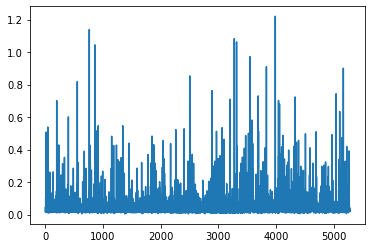

In [29]:
plt.plot(tmp[tmp != 0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6dfcccccd0>]],
      dtype=object)

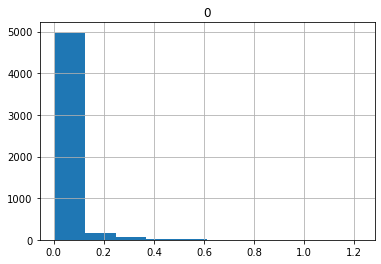

In [30]:
pd.DataFrame(tmp[tmp != 0]).hist()

In [41]:
val = data.loc[:, data.keys()[2:]].to_numpy().astype(np.float32)

In [42]:
val.shape

(100, 17382)

In [52]:
sample.index = sample['SAMPID']

In [56]:
sample = sample.loc[data.keys()[2:]]

In [58]:
data.index = data.Name

In [67]:
data = data.drop(columns = ['Name', 'Description'])

In [71]:
data.transpose().corr().shape

(100, 100)

In [97]:
res = np.zeros(shape = (100,100))
for i in range(100):
    for j in range(i+1, 100):
        res[i,j] = data.iloc[[i,j]].transpose().corr().iloc[0][1]

In [98]:
pd.DataFrame(res)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.081908,0.018211,0.181078,0.080914,0.063978,0.100390,0.034440,0.298725,0.110512,...,0.090755,0.142468,0.021609,-0.027647,0.436313,0.113697,0.161088,0.027524,-0.055647,0.536167
1,0.0,0.000000,0.089267,-0.023312,-0.020190,-0.090528,-0.099835,-0.117145,0.094330,0.013247,...,0.415810,0.602166,0.023465,0.533535,0.177302,0.256476,0.291858,-0.001037,0.276292,0.073778
2,0.0,0.000000,0.000000,0.009848,-0.002921,0.009067,0.001313,0.008285,0.001609,-0.002032,...,0.050594,0.062735,0.019060,0.059858,0.021832,0.031506,0.039672,0.007032,0.037987,0.013449
3,0.0,0.000000,0.000000,0.000000,0.393966,0.598822,0.638112,0.400843,0.061383,-0.019761,...,-0.018322,-0.012784,0.154779,-0.038191,0.089261,0.028281,0.033190,0.102358,-0.071936,0.098504
4,0.0,0.000000,0.000000,0.000000,0.000000,0.399001,0.440002,0.291120,0.036993,-0.005890,...,-0.040011,-0.015464,0.115457,-0.018131,0.028690,0.017620,0.008201,0.069120,-0.036012,0.023049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120026,0.009013,-0.080757,0.133865
96,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001734,0.168970,0.390609
97,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.009139,0.000805
98,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.011129


In [7]:
import gzip
dfile = gzip.open('GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct.gz', 'r')

In [3]:
dfile

<gzip _io.BufferedReader name='GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct.gz' 0x7faeb06a8b50>

In [8]:
count = 0
for line in dfile:
    count += 1

In [9]:
count

56203